### Random Forest

In [2]:
import pandas as pd
df=pd.read_csv('data.csv')

In [3]:
### define outliers 
mean = df['ncp'].mean()
std_dev = df['ncp'].std()
df['Outlier'] = (df['ncp'] < mean - 10*std_dev) | (df['ncp'] > mean + 10*std_dev)

### drop outliers 

df = df.drop(df[df['Outlier'] == True].index)
### drop nan
df = df.dropna() 

In [4]:
df.shape

(355296, 38)

In [3]:
# feature_columns = [ 'Lat', 'Lon', 'Yr', 'salt',
#        'temp', 'press', 'neto2', 'yrmn', 'jd', 'wsi', 'wsj',
#        'yd', 'mli', 'mlj', 'CbPM', 'VGPM', 'CDOM', 'CHL', 'KD490',
#        'PAR', 'PIC', 'POC', 'aot', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_510',
#        'Rrs_555', 'Rrs_670']
feature_columns = [ 'Lat', 'Lon', 'salt',
       'temp', 'press', 'neto2', 'Lon70', 'yrmn', 'jd', 'wsi', 'wsj','mli', 'CbPM', 'VGPM', 'CDOM', 'KD490',
       'PAR','POC', 'aot', 'Rrs_412', 'Rrs_443','Rrs_510']

In [4]:

### round and group by 0.1


import pandas as pd
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df['rounded_lat'] = df['Lat'].round(1)
df['rounded_lon'] = df['Lon'].round(1)

# Group by the rounded latitude and longitude, then calculate the mean of ncp and other feature columns for each group
mean_values = df.groupby(['rounded_lat', 'rounded_lon'])[feature_columns + ['ncp']].mean().reset_index()

# Convert the DataFrame to a GeoDataFrame using the rounded latitude and longitude as the geometry
geometry = gpd.points_from_xy(mean_values['rounded_lon'], mean_values['rounded_lat'])
mean_values_gdf = gpd.GeoDataFrame(mean_values, geometry=geometry)

# Set the CRS to WGS84 (expressed in lat/lon)
mean_values_gdf.set_crs(epsg=4326, inplace=True)


/tmp/ipykernel_2793856/3299713385.py:2: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


,rounded_lat,rounded_lon,Lat,Lon,salt,temp,press,neto2,Lon70,yrmn,...,CDOM,KD490,PAR,POC,aot,Rrs_412,Rrs_443,Rrs_510,ncp,geometry
0,-71.2,-76.5,-71.240670,-76.500830,33.070000,-1.155000,99.857000,-1.155000,-76.500830,200703.0,...,0.125000,0.147680,15.011300,146.623367,0.008600,0.006600,0.004830,0.003720,52.252819,POINT (-76.50000 -71.20000)
1,-71.1,172.0,-71.110000,171.970000,34.270000,-1.640000,96.340000,-1.640000,171.970000,200212.0,...,1.217810,0.046970,46.146599,56.138889,0.020730,0.009140,0.007930,0.004390,-50.602075,POINT (172.00000 -71.10000)
2,-70.4,-8.1,-70.352800,-8.089050,33.384030,-0.589500,994.995000,-0.589500,-8.089050,200902.0,...,0.104900,0.135850,33.033951,151.281555,0.028630,0.007260,0.005240,0.004130,38.150254,POINT (-8.10000 -70.40000)
3,-70.3,-8.1,-70.343371,-8.081500,33.393867,-0.530571,994.995714,-0.530571,-8.081500,200902.0,...,0.104900,0.135850,33.033951,151.281555,0.028630,0.007260,0.005240,0.004130,40.738383,POINT (-8.10000 -70.30000)
4,-70.3,-7.9,-70.286862,-7.886375,33.498662,-0.566000,994.833750,-0.566000,-7.886375,200902.0,...,0.368600,0.114950,32.730740,133.249908,0.036820,0.007250,0.005590,0.004360,44.423988,POINT (-7.90000 -70.30000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,48.1,-9.9,48.051125,-9.862736,35.158598,17.173583,101.045117,17.173583,-9.862736,200506.0,...,1.481000,0.048400,47.451309,56.399910,0.091700,0.007670,0.006840,0.003680,22.275413,POINT (-9.90000 48.10000)
4868,48.1,-9.8,48.077088,-9.794413,35.463607,16.787346,100.946491,16.787346,-9.794413,200506.0,...,0.861500,0.082000,48.607559,103.899910,0.083350,0.004600,0.004080,0.003040,25.847806,POINT (-9.80000 48.10000)
4869,48.2,-16.8,48.158228,-16.782017,35.724250,16.766800,100.815078,16.766800,-16.782017,200510.0,...,1.632000,0.049600,19.744650,67.866570,0.012470,0.004770,0.004350,0.002870,4.606193,POINT (-16.80000 48.20000)
4870,48.9,-16.5,48.933459,-16.485204,35.543906,15.709268,100.825393,15.709268,-16.485204,200510.0,...,7.383323,0.057577,16.110530,77.779180,0.011848,0.003369,0.003809,0.002739,5.619616,POINT (-16.50000 48.90000)


In [5]:
### split the train and test 

features = mean_values_gdf[feature_columns]
target = mean_values_gdf['ncp']

# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Add spatial bins column to the mean_values_gdf
mean_values_gdf['spatial_bin'] = pd.cut(mean_values_gdf['rounded_lat'], bins=5)

# Split the data into training and testing sets using spatial bins
train_data, test_data, train_labels, test_labels = train_test_split(features, target, stratify=mean_values_gdf['spatial_bin'], test_size=0.2, random_state=42)

In [9]:

### grid search 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize a RandomForestRegressor
rf = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(train_data, train_labels)

# Get the best parameters
best_params = grid_search.best_params_
print (best_params)

In [15]:
best_params

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

In [10]:
# Initialize a RandomForestRegressor with best parameters
best_rf = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                max_depth=best_params['max_depth'],
                                min_samples_split=best_params['min_samples_split'])

# Fit the model
best_rf.fit(train_data, train_labels)

# Make predictions
rf_predictions = best_rf.predict(test_data)

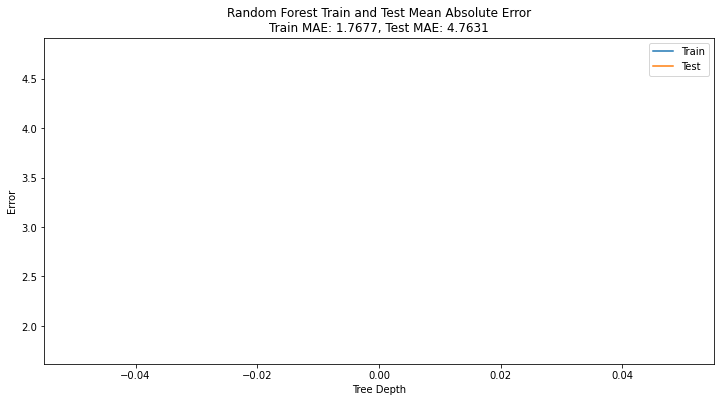

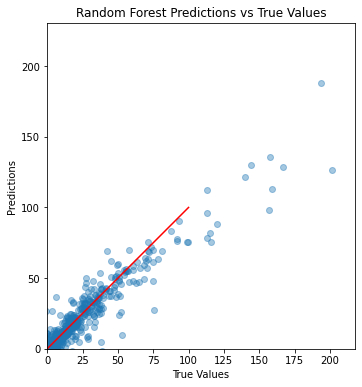

In [13]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
# Training metrics for Random Forest
rf_train_preds = best_rf.predict(train_data)
rf_train_mae = mean_absolute_error(train_labels, rf_train_preds)

# Testing metrics for Random Forest
rf_test_preds = best_rf.predict(test_data)
rf_test_mae = mean_absolute_error(test_labels, rf_test_preds)

# Plotting training and testing Mean Absolute Error for Random Forest
plt.figure(figsize=(12, 6))
plt.plot(rf_train_mae, label='Train')
plt.plot(rf_test_mae, label='Test')
plt.title(f'Random Forest Train and Test Mean Absolute Error\nTrain MAE: {rf_train_mae:.4f}, Test MAE: {rf_test_mae:.4f}')
plt.ylabel('Error')
plt.xlabel('Tree Depth')
plt.legend()
plt.show()

# Plotting Actual vs Predicted values for Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(test_labels, rf_test_preds, alpha=0.4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100], color='red')
plt.title('Random Forest Predictions vs True Values')
plt.show()


In [ ]:
### following read the nn model and make some comparison 


In [33]:
from tensorflow.keras.models import load_model
model = load_model('nn.h5')

test_predictions = model.predict(test_data2).flatten()


In [34]:
nn_r2 = r2_score(test_labels2, test_predictions)
print(f"Neural Network R2: {nn_r2*100:.2f}%")

Neural Network R2: 97.22%


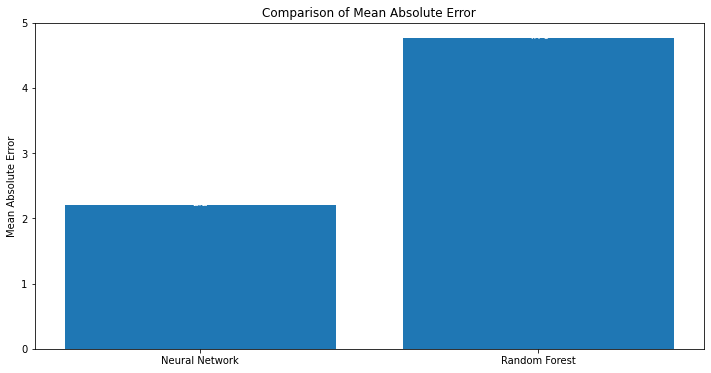

In [21]:
plt.figure(figsize=(12, 6))
barlist = plt.bar(['Neural Network', 'Random Forest'], [2.1998, 4.7631])

plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Mean Absolute Error')
plt.text('Neural Network', 2.1998, round(2.1998,2), ha = 'center', color='white')
plt.text('Random Forest', 4.7631, round(4.7631,2), ha = 'center', color='white')
plt.show()


In [23]:
from sklearn.metrics import r2_score
rf_r2 = r2_score(test_labels, rf_predictions)
print(f"Random Forest R2: {rf_r2*100:.2f}%")

Random Forest R2: 89.71%


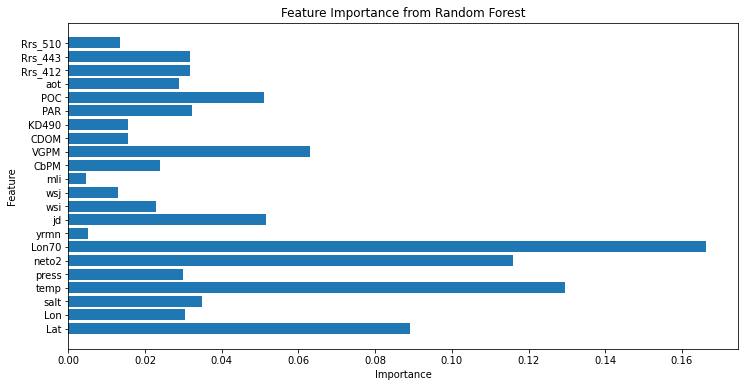

In [16]:
# Get feature importances
importances = best_rf.feature_importances_

# Plot
plt.figure(figsize=(12, 6))
plt.barh(feature_columns, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


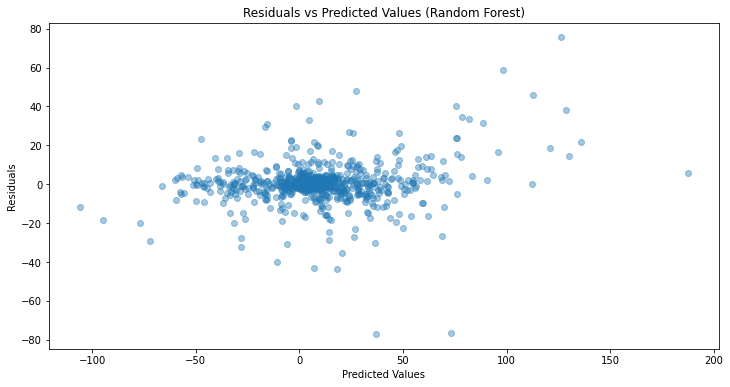

In [17]:
# Residuals for Random Forest
residuals_rf = test_labels - rf_predictions

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(rf_predictions, residuals_rf, alpha=0.4)
plt.title('Residuals vs Predicted Values (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [4]:
df=df[feature_columns]

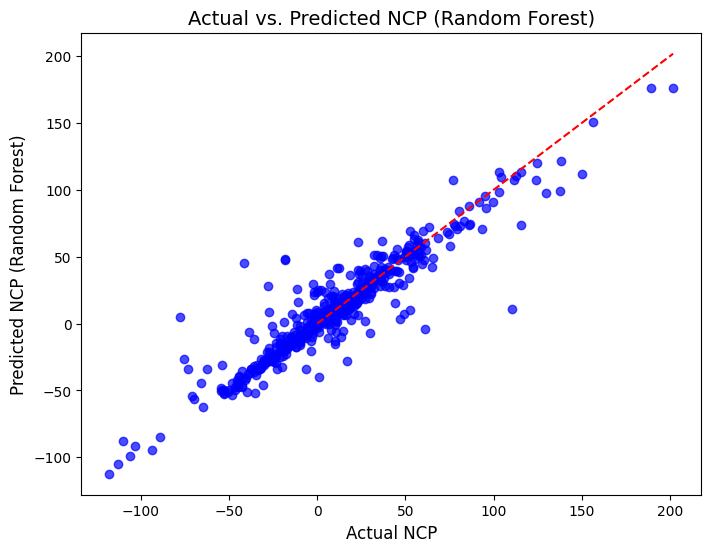

In [6]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_rf are the actual and predicted NCP values, respectively

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Actual NCP', fontsize=12)
plt.ylabel('Predicted NCP (Random Forest)', fontsize=12)
plt.title('Actual vs. Predicted NCP (Random Forest)', fontsize=14)

# Add a diagonal line for reference (perfect prediction)
max_ncp = max(max(y_test), max(y_pred_rf))
plt.plot([0, max_ncp], [0, max_ncp], color='red', linestyle='--')

plt.show()


<Figure size 1000x600 with 0 Axes>

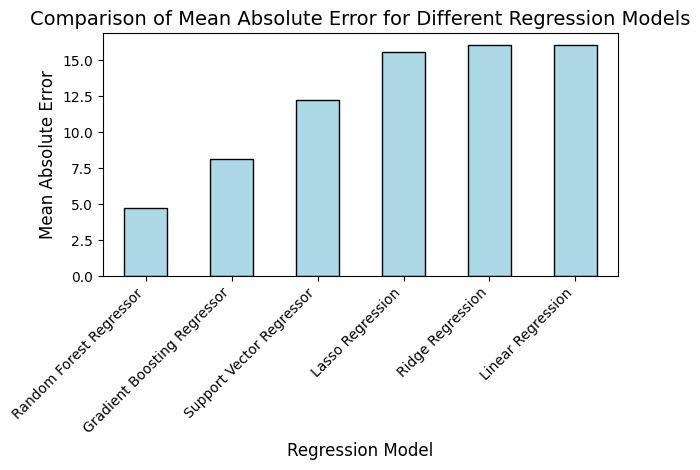

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}
# train_data, test_data, train_labels, test_labels 
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(train_data, train_labels)
    y_pred = model.predict(test_data)
    mae = mean_absolute_error(test_labels, y_pred)
    results[name] = mae

# Convert the results to a DataFrame for plotting
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Mean Absolute Error'])

plt.figure(figsize=(10, 6))
results_df.sort_values(by='Mean Absolute Error').plot(kind='bar', legend=False, color='lightblue', edgecolor='black')
plt.xlabel('Regression Model', fontsize=12)
plt.ylabel('Mean Absolute Error', fontsize=12)
plt.title('Comparison of Mean Absolute Error for Different Regression Models', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


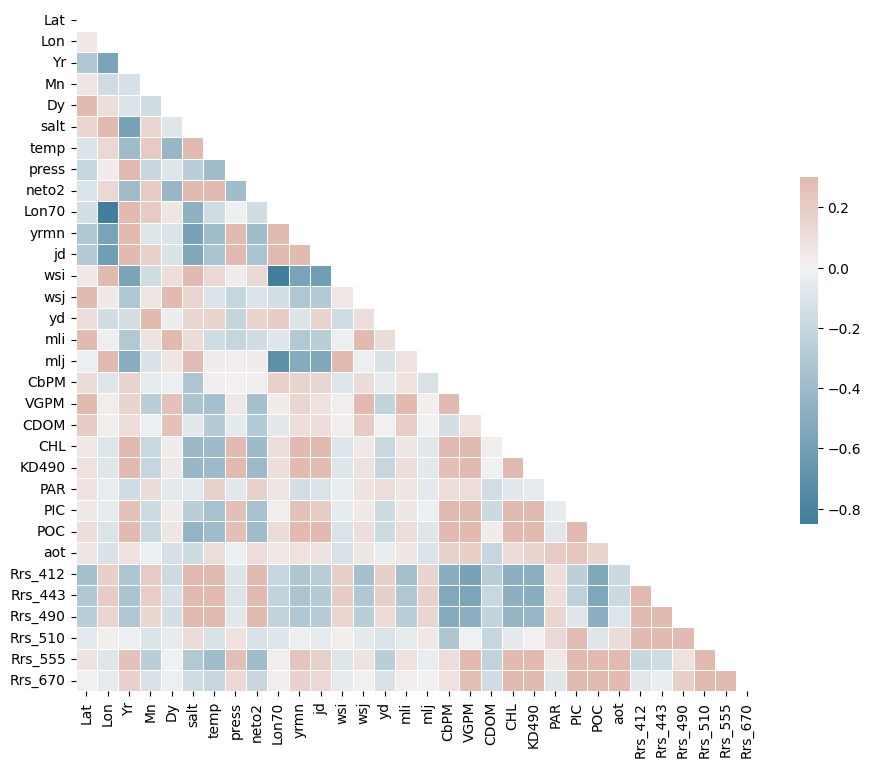

In [41]:

### Correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr = X_train.corr()

# upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()



Moran's I is a measure of global spatial autocorrelation. It ranges from -1 (indicating perfect dispersion) through 0 (random pattern) to +1 (perfect correlation).------>indicates a very high positive spatial autocorrelation